# EDA - Classification

## Data

https://www.kaggle.com/datasets/uciml/german-credit


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
credit = pd.read_csv("https://raw.githubusercontent.com/gabrielalusofona/icd/refs/heads/main/data/german_credit_data.csv")
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [30]:
numerical_columns = ['Age', 'Job', 'Credit amount', 'Duration']

In [11]:
# not really numerical
credit['Job'].value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

## Examine classes and class imbalance

* Class imbalance means that there are unequal numbers of cases for the categories of the label.
    * can seriously bias the training of classifier algorithms

**Most real-world classification problems have class imbalance**

In [9]:
credit['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [10]:
credit['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

## Visualize class separation by numeric features

<Axes: xlabel='Risk', ylabel='Age'>

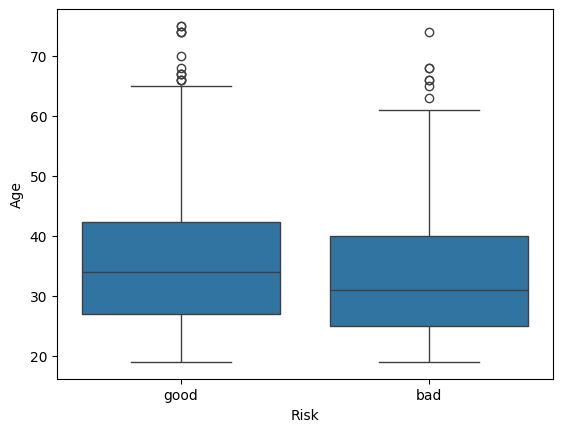

In [14]:
sns.boxplot(data=credit, x='Risk', y=numerical_columns[0])

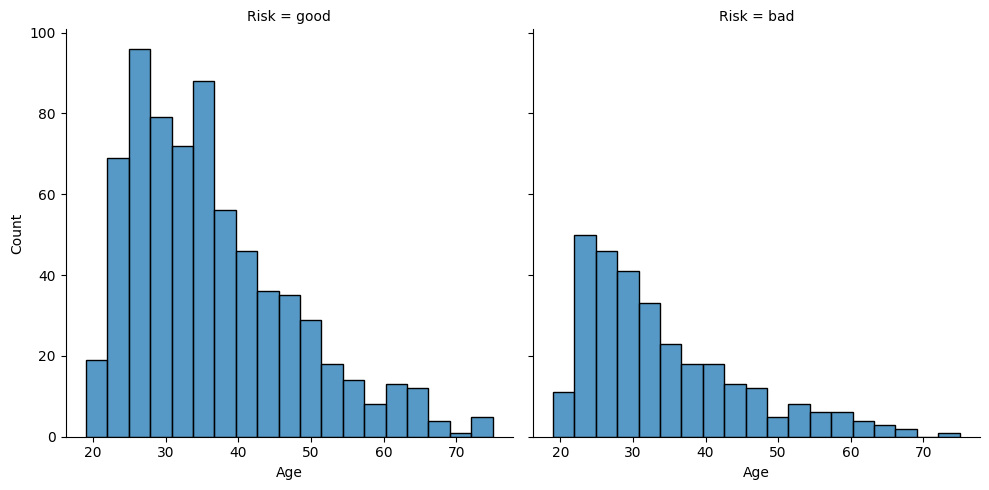

In [17]:
sns.displot(data=credit, col='Risk', x=numerical_columns[0])

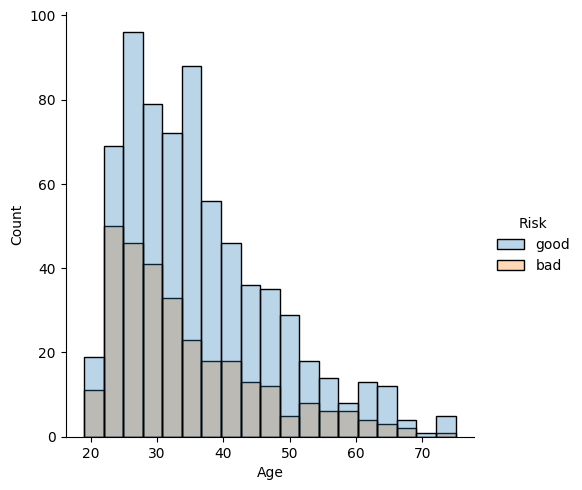

In [20]:
sns.displot(data=credit, hue='Risk', x=numerical_columns[0], alpha=0.3)

<Axes: xlabel='Risk', ylabel='Age'>

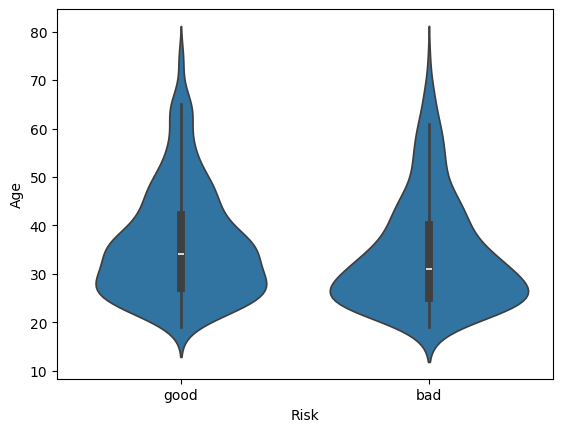

In [21]:
sns.violinplot(data=credit, x='Risk', y=numerical_columns[0])

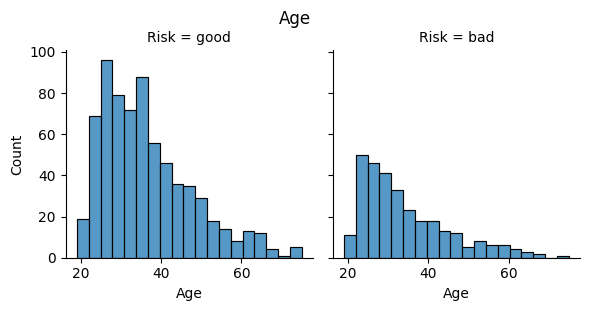

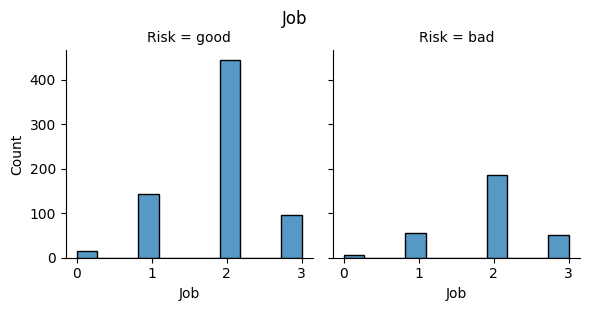

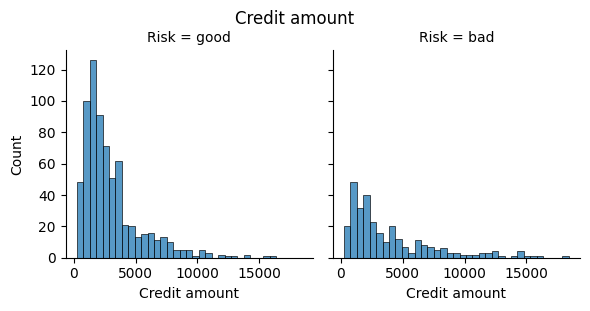

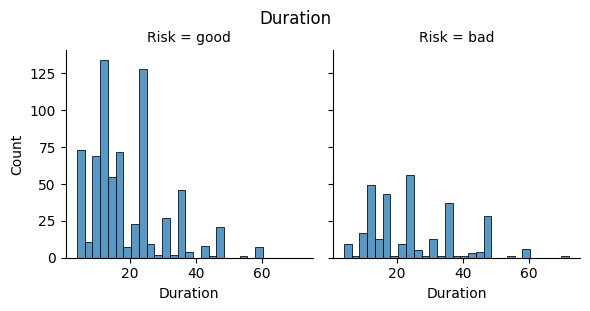

In [31]:
for col in numerical_columns:
    g = sns.displot(data=credit, col='Risk', x=col, height=3)
    g.fig.suptitle(col, y=1.02)

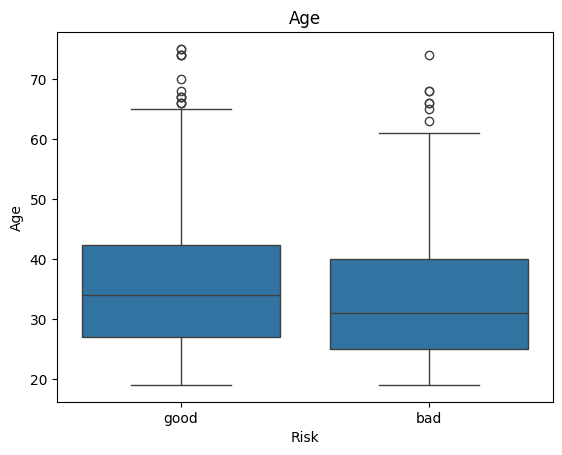

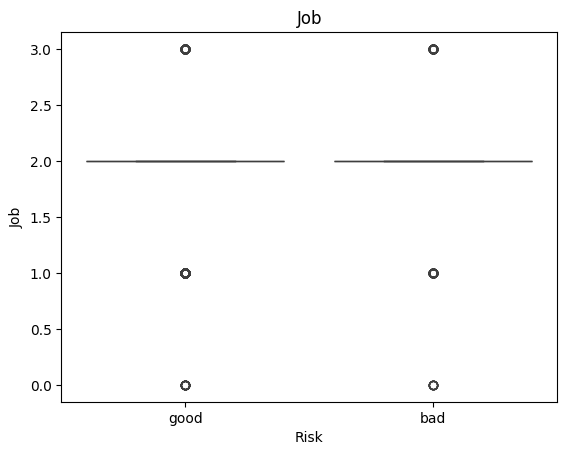

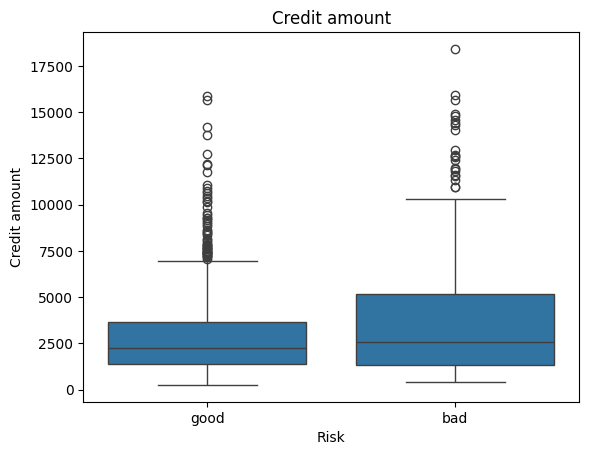

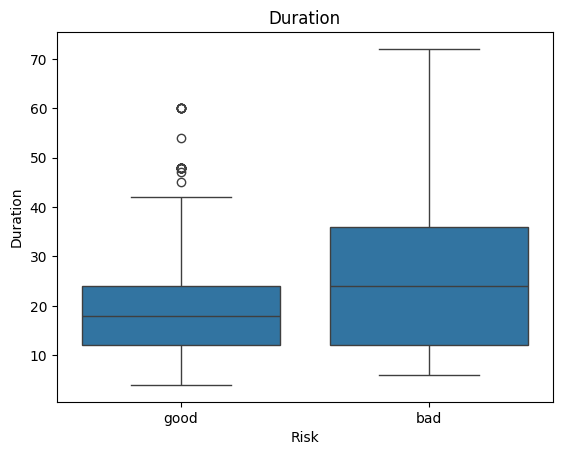

In [36]:
for col in numerical_columns:
    g = sns.boxplot(data=credit, x='Risk', y=col)
    plt.title(col)
    plt.show()

## Visualize class separation by categorical features

In [38]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [47]:
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [41]:
credit.groupby(['Checking account', 'Purpose']).count()

Age  Sex  Job  Housing  Saving accounts  \
Checking account Purpose                                                        
little           business              15   15   15       15               14   
                 car                  104  104  104      104               91   
                 domestic appliances    5    5    5        5                4   
                 education             15   15   15       15               12   
                 furniture/equipment   72   72   72       72               65   
                 radio/TV              54   54   54       54               51   
                 repairs                5    5    5        5                5   
                 vacation/others        4    4    4        4                3   
moderate         business              40   40   40       40               34   
                 car                   81   81   81       81               66   
                 domestic appliances    2    2    2        2                1   
                 education             16   16   16       16               12   
                 furniture/equipment   39   39   39       39               33   
                 radio/TV              75   75   75       75               63   
                 repairs                9    9    9        9                9   
                 vacation/others        7    7    7        7                6   
rich             business               5    5    5        5                5   
                 car                   18   18   18       18               16   
                 domestic appliances    1    1    1        1                1   
                 education              4    4    4        4                4   
                 furniture/equipment   11   11   11       11                9   
                 radio/TV              24   24   24       24               18   

                                      Credit amount  Duration  Risk  
Checking account Purpose                                             
little           business                        15        15    15  
                 car                            104       104   104  
                 domestic appliances              5         5     5  
                 education                       15        15    15  
                 furniture/equipment             72        72    72  
                 radio/TV                        54        54    54  
                 repairs                          5         5     5  
                 vacation/others                  4         4     4  
moderate         business                        40        40    40  
                 car                             81        81    81  
                 domestic appliances              2         2     2  
                 education                       16        16    16  
                 furniture/equipment             39        39    39  
                 radio/TV                        75        75    75  
                 repairs                          9         9     9  
                 vacation/others                  7         7     7  
rich             business                         5         5     5  
                 car                             18        18    18  
                 domestic appliances              1         1     1  
                 education                        4         4     4  
                 furniture/equipment             11        11    11  
                 radio/TV                        24        24    24

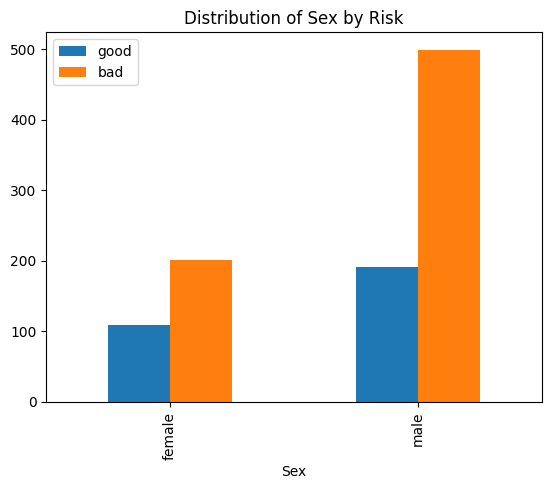

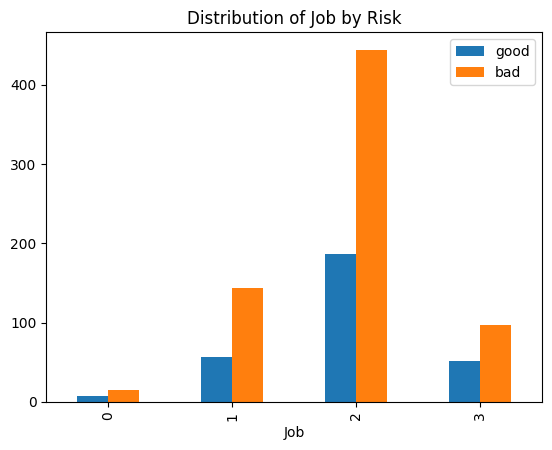

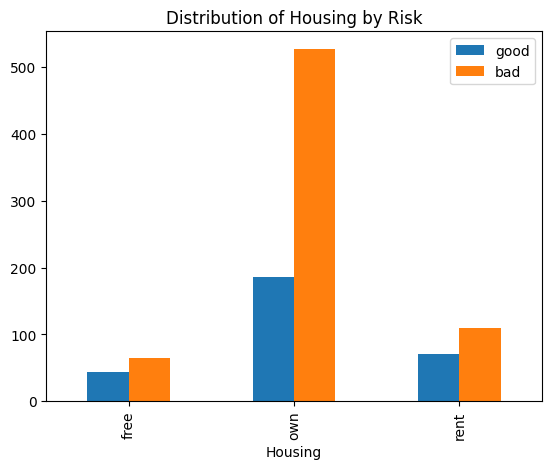

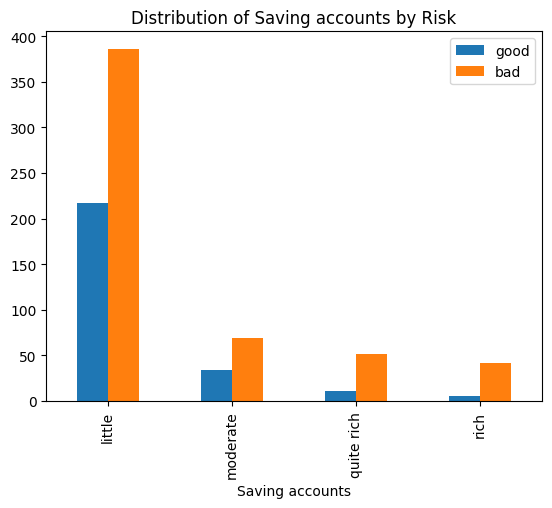

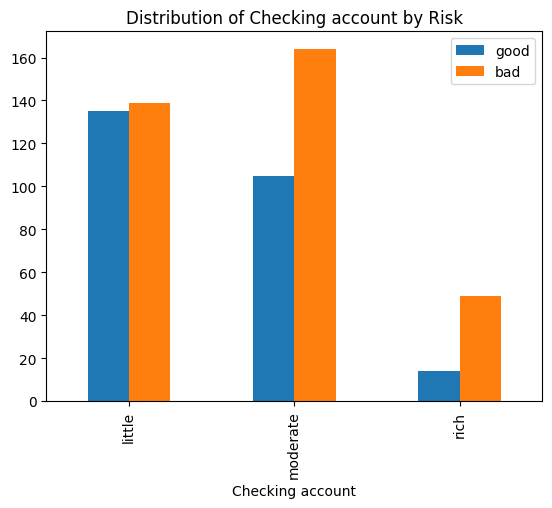

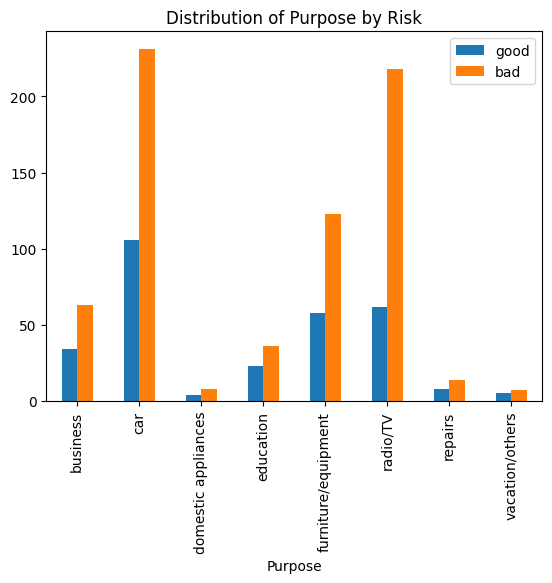

In [50]:
# sugestao beatriz
for col in categorical_columns:
    crosstab = pd.crosstab(credit[col], credit['Risk'])
    ax = crosstab.plot(kind='bar', title=f"Distribution of {col} by Risk")
    ax.legend(credit['Risk'])

In [51]:
crosstab

Risk,bad,good
Purpose,,
business,34,63
car,106,231
domestic appliances,4,8
education,23,36
furniture/equipment,58,123
radio/TV,62,218
repairs,8,14
vacation/others,5,7


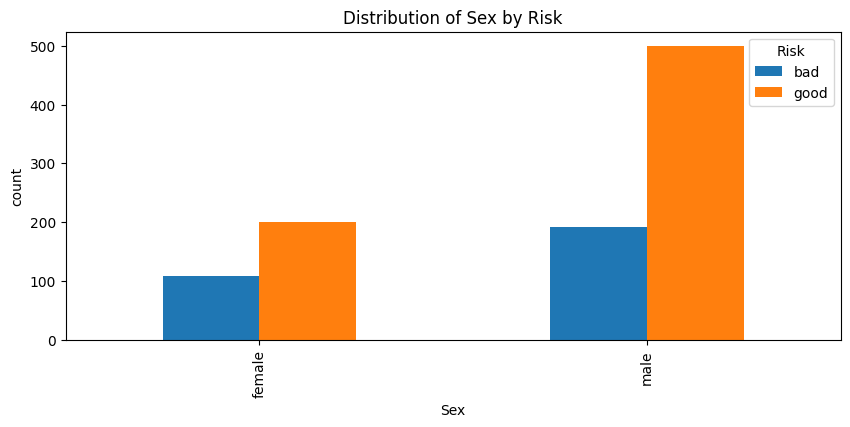

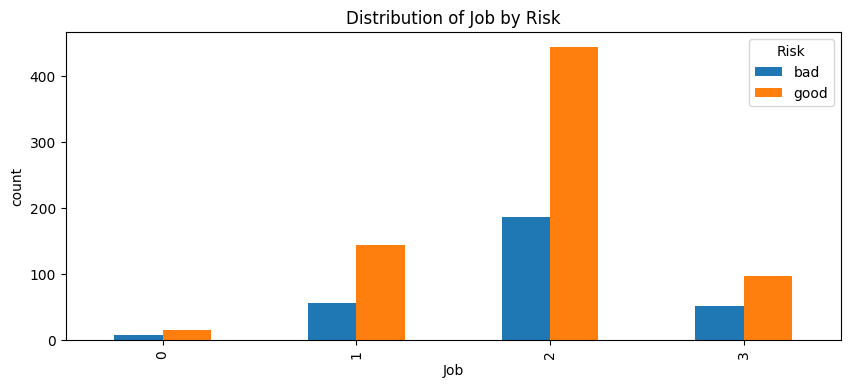

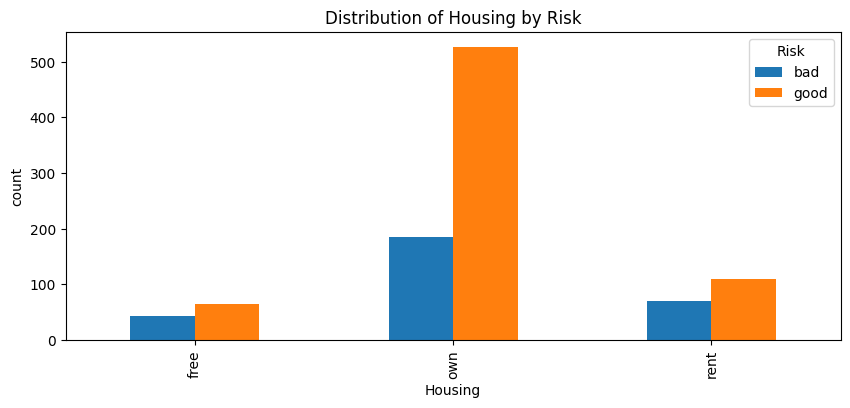

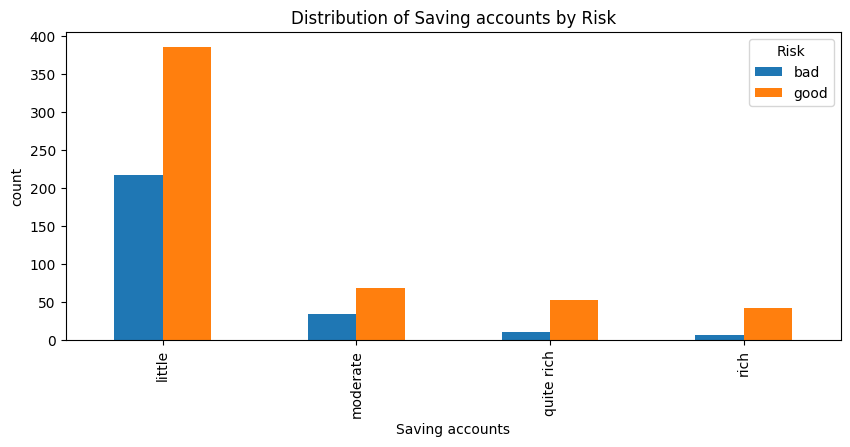

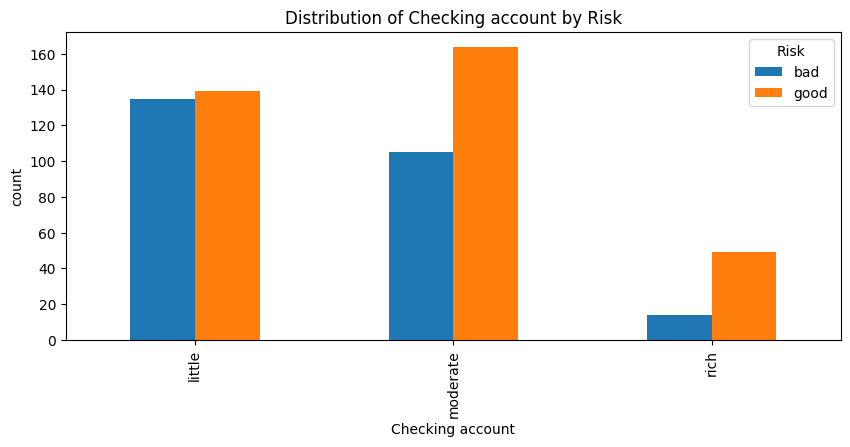

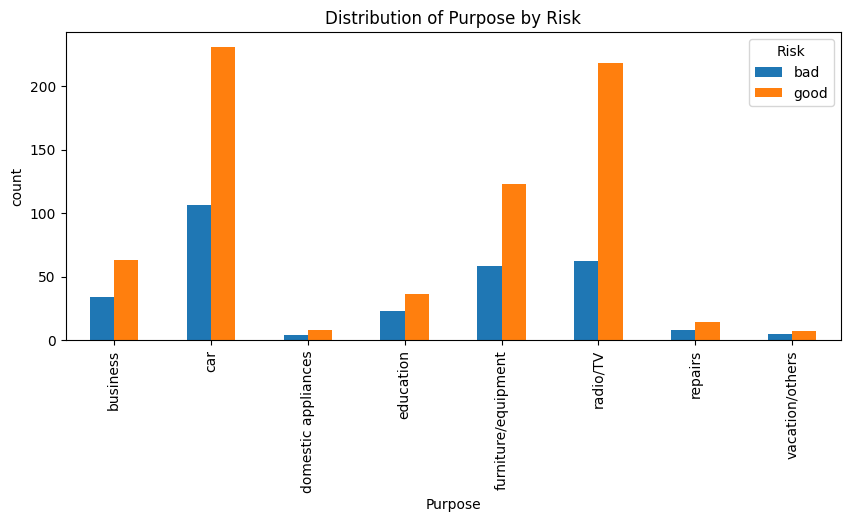

In [49]:
for col in categorical_columns:
    (
        credit
        .groupby(['Risk', col])
        .size()
        .unstack(0) # create 0 and 1 columns
        .plot(kind='bar', figsize=(10,4))
    )
    plt.title(f"Distribution of {col} by Risk")
    plt.ylabel('count')

## Discussion

1. Using the visualizations, which features do you think we should consider in our model to predict the Risk of credit

In [39]:
categorical_columns = ['Job', 'Saving accounts', 'Checking account', 'Purpose']